In [9]:
import pandas as pd

In [2]:
df = pd.read_csv("raw data/data_train/raw_data_train.csv")

In [4]:
print(f"Số lượng mẫu trong tập dữ liệu: {df.shape[0]}")

Số lượng mẫu trong tập dữ liệu: 2265


In [5]:
print(f"Số lượng đặc trưng trong mỗi mẫu: {df.shape[1]}")

Số lượng đặc trưng trong mỗi mẫu: 8


In [6]:
print(df.dtypes)

Gia              object
Dia chi          object
Dien tich        object
Gia/m2           object
Huong dat        object
Loai hinh dat    object
Chieu ngang      object
Chieu dai        object
dtype: object


In [7]:
missing_values_count = df.isna().sum()

# In ra số lượng giá trị trống của mỗi cột
print(missing_values_count)

Gia               133
Dia chi           133
Dien tich         133
Gia/m2            893
Huong dat         954
Loai hinh dat     133
Chieu ngang       650
Chieu dai        1327
dtype: int64


Đổi tên các giá trị của cột

Hàm loại bỏ 'tỷ' trong cột Gia


In [14]:
def remove_tỉ_and_convert(string):
    if isinstance(string, str):
        return string.replace(" tỷ", "")
    else:
        return string

Hàm chuyển triệu thành tỷ

In [15]:
def convert_to_billion(string):
    if " triệu" in string:
        value = float(string.replace(" triệu", "").replace(",", "."))
        return value / 1000  # Chuyển đổi từ triệu sang tỷ
    else:
        return string

In [5]:
df.rename(columns={'Gia/m2': 'Gia/m²'}, inplace=True)
df.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [6]:
df['Gia/m²']

0        31,5 triệu/m²
1       69,33 triệu/m²
2       31,65 triệu/m²
3        16,8 triệu/m²
4       67,39 triệu/m²
             ...      
2260               NaN
2261               NaN
2262               NaN
2263               NaN
2264               NaN
Name: Gia/m², Length: 2265, dtype: object

In [7]:
df1 = pd.read_csv("clean data/clean_data_train.csv")

In [8]:
df1

,Gia,Dia chi,Dien tich,Gia/m²,Huong dat,Loai hinh dat,Chieu ngang,Chieu dai
0,"3,15 tỷ - 100 m2","Lô 46 B2.96, Hói Kiểng 30, Phường Hoà Quý, Quậ...",100 m²,"31,5 triệu/m²",Tây Bắc,Đất nền dự án,5 m,NaN
1,"5,2 tỷ - 75 m2","Đường Trần Thanh Mại, Phường An Hải Bắc, Quận ...",75 m²,"69,33 triệu/m²",NaN,Đất thổ cư,NaN,NaN
2,"2,5 tỷ - 79 m2","Ngô Quyền, Phường Mân Thái, Quận Sơn Trà, Đà N...",79 m²,"31,65 triệu/m²",Đông Nam,Đất thổ cư,6 m,14 m
3,"2,1 tỷ - 125 m2","13, Đường Lạc Long Quân, Phường Hòa Khánh Bắc,...",125 m²,"16,8 triệu/m²",Đông Bắc,Đất thổ cư,4.1999 m,31 m
4,"6,2 tỷ - 92 m2","68, Đường Hòa Minh 8, Phường Hòa Minh, Quận Li...",92 m²,"67,39 triệu/m²",Tây Nam,Đất thổ cư,4 m,21 m
...,...,...,...,...,...,...,...,...
2260,1.3 Tỷ,", Quận Ngũ Hành Sơn",100 m²,NaN,NaN,Đất nền dự án,NaN,NaN
2261,1.6 Tỷ,", Quận Ngũ Hành Sơn",120 m²,NaN,NaN,Đất nền dự án,NaN,NaN
2262,1.4 Tỷ,", Quận Ngũ Hành Sơn",85 m²,NaN,NaN,Đất nền dự án,NaN,NaN
2263,1.5 Tỷ,", Quận Ngũ Hành Sơn",200 m²,NaN,NaN,Đất nền dự án,NaN,NaN


In [9]:
df1['Gia'] = df1['Gia'].str.lower()
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

Lấy giá trị tiền

In [10]:
df1['Gia'] = df1['Gia'].str.split(' - ').str[0]
df1.dropna(subset=['Gia'], inplace=True)
df1 = df1[~df1['Gia'].str.contains('đ')]
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

Biến dấu phẩy thành dấu chấm

In [11]:
df1['Gia'] = df1['Gia'].str.replace(',', '.')

# Lưu kết quả vào file CSV
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21336\8849440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Gia'] = df1['Gia'].str.replace(',', '.')


Lệnh xóa 'tỷ' trong cột Gia

In [12]:
df1["Gia"] = df1["Gia"].apply(remove_tỉ_and_convert)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21336\1146972609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gia"] = df1["Gia"].apply(remove_tỉ_and_convert)


Lệnh chuyển triệu thành tỷ

In [13]:

df1["Gia"] = df1["Gia"].apply(convert_to_billion)
# df1['Dien tich (m²)'] = df1['Dien tich (m²)'].str.replace(' m²', '')
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_21336\2382169176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gia"] = df1["Gia"].apply(convert_to_billion)


In [14]:
df1 = df1[df1["Gia"] != 'thỏa thuận']
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


Xấp xỉ giá trị của cột Gia

In [15]:
df1['Gia'] = df1['Gia'].astype(float)
df1['Gia'] = df1['Gia'].round(2)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [16]:
df1 = df1[(df1['Gia'] >= 1) & (df1['Gia'] <= 20)]
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [17]:
df1["Gia"]

0       3.15
1       5.20
2       2.50
3       2.10
4       6.20
        ... 
2260    1.30
2261    1.60
2262    1.40
2263    1.50
2264    1.35
Name: Gia, Length: 1839, dtype: float64

In [18]:
def process_string(string):
    # Kiểm tra nếu giá trị không phải là chuỗi (string)
    if isinstance(string, str):
        # Biến đổi chuỗi thành chữ hoa ở chữ cái đầu và chữ thường ở phần còn lại
        processed_string = ' '.join(word.capitalize() for word in string.lower().split())
        return processed_string
    else:
        # Nếu giá trị không phải là chuỗi, trả về giá trị ban đầu
        return string


In [19]:
def remove_duplicates(string):
    # Kiểm tra nếu giá trị không phải là chuỗi (string)
    if isinstance(string, str):
        # Tách chuỗi thành các chuỗi con dựa trên dấu phẩy
        parts = string.split(", ")
        # Loại bỏ các chuỗi con trùng lặp và duy trì thứ tự của chúng
        unique_parts = []
        for part in parts:
            if part not in unique_parts:
                unique_parts.append(part)
        # Kết hợp các chuỗi con lại thành một chuỗi mới
        unique_string = ", ".join(unique_parts)
        return unique_string
    else:
        # Nếu giá trị không phải là chuỗi, trả về giá trị ban đầu
        return string

In [20]:
df1["Dia chi"] = df1["Dia chi"].apply(process_string)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [21]:
df1["Dia chi"] = df1["Dia chi"].apply(remove_duplicates)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


In [22]:
df1['Dia chi'] = df1['Dia chi'].str.replace(r"Lh \d+, ", "", regex=True)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [23]:
df1 = df1[~df1['Dia chi'].str.contains('\\?', regex=True)]
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [24]:
df1['Dia chi'] = df1['Dia chi'].str.replace(r"Lh\d+\s*,\s*", "", regex=True)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [25]:
df1['Dia chi'] = df1['Dia chi'].str.replace(r"Lh-\d{4}[.-]\d{3}[.-]\d{3},?\s*", "", regex=True)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [26]:
df1['Dia chi'] = df1['Dia chi'].str.replace(r"^,", "", regex=True)

df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [27]:
df1['Dia chi'] = df1['Dia chi'].str.strip()
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [28]:
df1['Dia chi']

0       Lô 46 B2.96, Hói Kiểng 30, Phường Hoà Quý, Quậ...
1       Đường Trần Thanh Mại, Phường An Hải Bắc, Quận ...
2       Ngô Quyền, Phường Mân Thái, Quận Sơn Trà, Đà N...
3       13, Đường Lạc Long Quân, Phường Hòa Khánh Bắc,...
4       68, Đường Hòa Minh 8, Phường Hòa Minh, Quận Li...
                              ...                        
2260                                    Quận Ngũ Hành Sơn
2261                                    Quận Ngũ Hành Sơn
2262                                    Quận Ngũ Hành Sơn
2263                                    Quận Ngũ Hành Sơn
2264                                    Quận Ngũ Hành Sơn
Name: Dia chi, Length: 1834, dtype: object

In [29]:
df1['Dien tich'] = df1['Dien tich'].str.replace(' m²', '')
df1['Dien tich'] = df1['Dien tich'].str.replace(' m2', '')
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [30]:
df1['Dien tich'] = df1['Dien tich'].astype(float)
df1['Dien tich'] = df1['Dien tich'].round(2)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [31]:
df1 = df1[df1['Dien tich'] <= 400]
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [32]:
df1['Dien tich']

0       100.0
1        75.0
2        79.0
3       125.0
4        92.0
        ...  
2260    100.0
2261    120.0
2262     85.0
2263    200.0
2264     85.0
Name: Dien tich, Length: 1792, dtype: float64

In [33]:
# df1= df1[~df1["Gia/m² (triệu/m²)"].str.contains("đ/m²")]
df1['Gia/m²'] = df1['Gia/m²'].str.replace(' triệu/m²', '')
df1['Gia/m²'] = df1['Gia/m²'].str.replace(' triệu/m2', '')
df1['Gia/m²'] = df1['Gia/m²'].str.replace(' đ/m²', '')
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [34]:
df1['Gia/m²'] = df1['Gia/m²'].fillna(0)

# Tính toán cột "Gia/m² (triệu/m²)" dựa trên giá trị của cột "Gia (tỉ)" và "Dien tich (m²)"
df1['Gia/m²'] = (df1['Gia'] * 1000) / df1['Dien tich']
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [35]:
df1['Gia/m²'] = df1['Gia/m²'].astype(float)
df1['Gia/m²'] = df1['Gia/m²'].round(2)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [36]:
df1['Gia/m²']

0       31.50
1       69.33
2       31.65
3       16.80
4       67.39
        ...  
2260    13.00
2261    13.33
2262    16.47
2263     7.50
2264    15.88
Name: Gia/m², Length: 1792, dtype: float64

In [37]:
df1['Huong dat'] = df1['Huong dat'].str.replace('Hướng: ', '')
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [38]:
df1["Huong dat"] = df1["Huong dat"].apply(process_string)
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [39]:
df1["Huong dat"]

0        Tây Bắc
1            NaN
2       Đông Nam
3       Đông Bắc
4        Tây Nam
          ...   
2260         NaN
2261         NaN
2262         NaN
2263         NaN
2264    Đông Bắc
Name: Huong dat, Length: 1792, dtype: object

In [40]:
df1['Loai hinh dat'] = df1['Loai hinh dat'].str.replace("Đất nền dự án", "Đất nền dự án", regex=True)

df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [41]:
df1 = df1[df1['Loai hinh dat'] != 'Đất công nghiệp']
df1.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [42]:
count_elements = df1['Loai hinh dat'].value_counts()

# Hiển thị kết quả
print(count_elements)

Loai hinh dat
Đất thổ cư       931
Đất nền dự án    860
Name: count, dtype: int64


In [43]:
df2 = pd.read_csv("clean data/clean_data_train.csv")

In [44]:
df2['Chieu ngang'] = df2['Chieu ngang'].str.replace('m', '')
df2['Chieu ngang'] = df2['Chieu ngang'].str.replace('Mặt tiền: ', '')

df2 = df2[(df2['Chieu ngang'].notna()) | (df2['Chieu dai'].notna())]
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


In [45]:
df2 = df2.dropna(subset=['Chieu ngang'])
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)


In [46]:
df2['Chieu ngang'] = df2['Chieu ngang'].astype(float)
df2['Chieu ngang'] = df2['Chieu ngang'].round(2)
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [47]:
df2 = df2[(df2['Chieu ngang'] > 4) & (df2['Chieu ngang'] <= 20)]
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [48]:
df2['Chieu ngang'] 

0        5.0
2        6.0
3        4.2
5       10.0
6        5.0
        ... 
1773     5.0
1783     5.0
1784     5.0
1785     6.0
1790     5.0
Name: Chieu ngang, Length: 1302, dtype: float64

In [49]:
df2['Chieu dai'] = df2['Chieu dai'].str.replace('m', '')
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [50]:
def update_dimensions(row):
    if pd.isna(row['Chieu ngang']) and not pd.isna(row['Chieu dai']):
        row['Chieu ngang'] = row['Dien tich'] / row['Chieu dai']
    elif not pd.isna(row['Chieu ngang']) and pd.isna(row['Chieu dai']):
        row['Chieu dai'] = row['Dien tich'] / row['Chieu ngang']
    return row

In [51]:
df2= df2.apply(update_dimensions, axis=1)
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [52]:
df2['Chieu dai'] = df2['Chieu dai'].astype(float)
df2['Chieu dai'] = df2['Chieu dai'].round(2)
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [53]:
df2 = df2[(df2['Chieu dai'] >= 10) & (df2['Chieu dai'] <= 40)]
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [54]:
df2['Chieu dai'] 

0       20.00
2       14.00
3       31.00
5       22.00
6       17.50
        ...  
1773    17.00
1783    17.00
1784    17.00
1785    20.17
1790    17.00
Name: Chieu dai, Length: 1274, dtype: float64

In [55]:
def count_commas(string):
    if isinstance(string, str):
        return string.count(',')
    else:
        return 0  # Trả về 0 nếu giá trị không phải là chuỗi

In [56]:
def add_huyen_if_empty(row):
    if pd.isna(row['Quan']):  # Kiểm tra nếu cột "Quan" rỗng
        dia_chi_parts = row['Dia chi'].split(", ")
        # Lấy giá trị của cột "Dia chi" có chứa huyện (tỉnh) và trả về phần tử đầu tiên
        for part in dia_chi_parts:
            if "Huyện" in part:
                huyen_part = part.split("Huyện")[1].strip()
                if huyen_part:  # Kiểm tra xem phần tử có giá trị không
                    return huyen_part
    return row['Quan']  # Giữ nguyên giá trị của cột "Quan" nếu nó không rỗng

In [57]:
df2["Quan"] = df2["Dia chi"].str.extract(r"Quận (\D+),")
# Xóa khoảng trắng ở đầu và cuối của chuỗi trong cột "Quan"
df2["Quan"] = df2["Quan"].str.strip()
# comma_counts = df3['Quan'].str.count(',')

# # Lọc các hàng mà số dấu phẩy lớn hơn 2
# df3 = df3[comma_counts < 1]
df2 = df2[df2['Quan'].apply(count_commas) < 1]
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [58]:
df2['Quan'] = df2.apply(add_huyen_if_empty, axis=1)
df2['Quan'] = df2['Quan'].str.replace('Huyện', '').str.strip()
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [59]:
mask = df2['Quan'].isnull()

# Thêm phần từ "Quận" hoặc "Huyện" đến hết vào cột 'quan' nếu cột đó là null
df2.loc[mask, 'Quan'] = df2.loc[mask, 'Dia chi'].str.split('Quận|Huyện').str[-1].str.strip()
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [60]:
df2['Quan']

0       Ngũ Hành Sơn
2            Sơn Trà
3         Liên Chiểu
5             Cẩm Lệ
6             Cẩm Lệ
            ...     
1773    Ngũ Hành Sơn
1783    Ngũ Hành Sơn
1784    Ngũ Hành Sơn
1785      Liên Chiểu
1790    Ngũ Hành Sơn
Name: Quan, Length: 1272, dtype: object

In [61]:
df2['Dia chi'] = df2['Dia chi'].str.replace('xem Bản Đồ', '')
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

In [62]:
df2 = df2[df2['Dia chi'] != 'Đường 7𝐦5- Khu E Kim Long, Phường Hòa Minh, Quận Liên Chiểu, Đà Nẵng']
df2.to_csv(".\\clean data\\clean_data_train.csv", encoding="utf-8-sig", index=False)

TRỰC QUAN DƯ LIỆU TRƯỚC VÀ SAU CLEAN

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df_crawl = pd.read_csv("raw data/data_train/raw_data_train.csv")

In [21]:
df_clean = pd.read_csv("clean data/clean_data_train.csv.csv")

In [28]:
print(f"Số lượng mẫu trong tập dữ liệu: {df_clean.shape[0]}")

Số lượng mẫu trong tập dữ liệu: 1290


In [29]:
print(f"Số lượng đặc trưng trong mỗi mẫu: {df_clean.shape[1]}")

Số lượng đặc trưng trong mỗi mẫu: 9


In [30]:
print(df_clean.dtypes)

Gia              float64
Dia chi           object
Dien tich        float64
Gia/m²           float64
Huong dat         object
Loai hinh dat     object
Chieu ngang      float64
Chieu dai        float64
Quan              object
dtype: object


In [31]:
missing_values_count = df_clean.isna().sum()

# In ra số lượng giá trị trống của mỗi cột
print(missing_values_count)

Gia                0
Dia chi            0
Dien tich          0
Gia/m²             0
Huong dat        334
Loai hinh dat      0
Chieu ngang        0
Chieu dai          0
Quan               0
dtype: int64


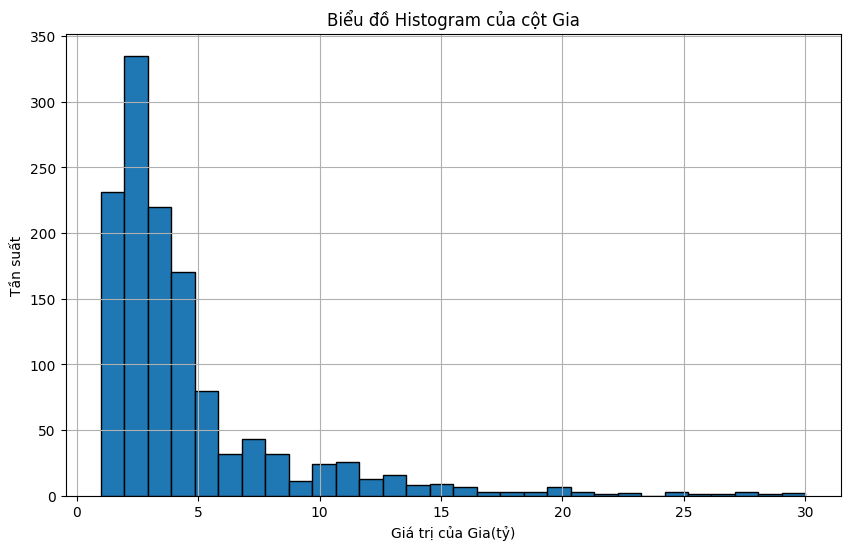

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Gia'], bins=30, edgecolor='black')
plt.title('Biểu đồ Histogram của cột Gia')
plt.xlabel('Giá trị của Gia(tỷ)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

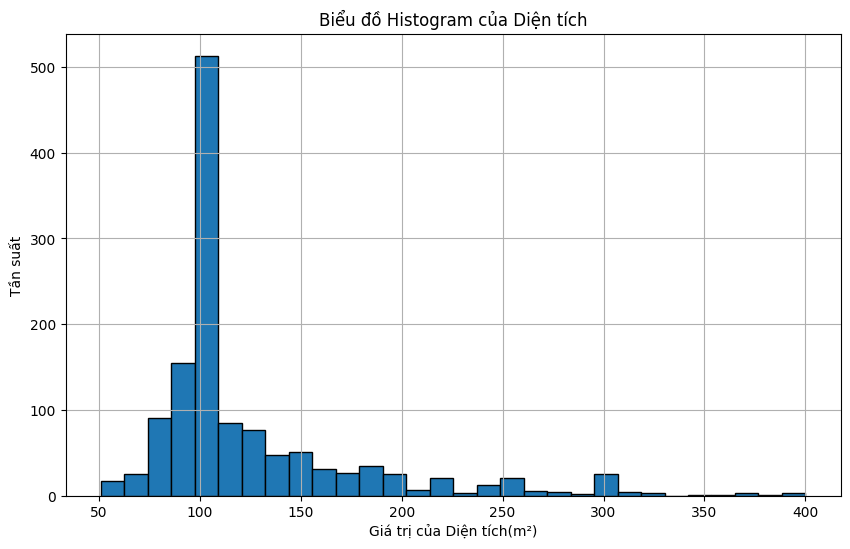

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Dien tich'], bins=30, edgecolor='black')
plt.title('Biểu đồ Histogram của Diện tích')
plt.xlabel('Giá trị của Diện tích(m²)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

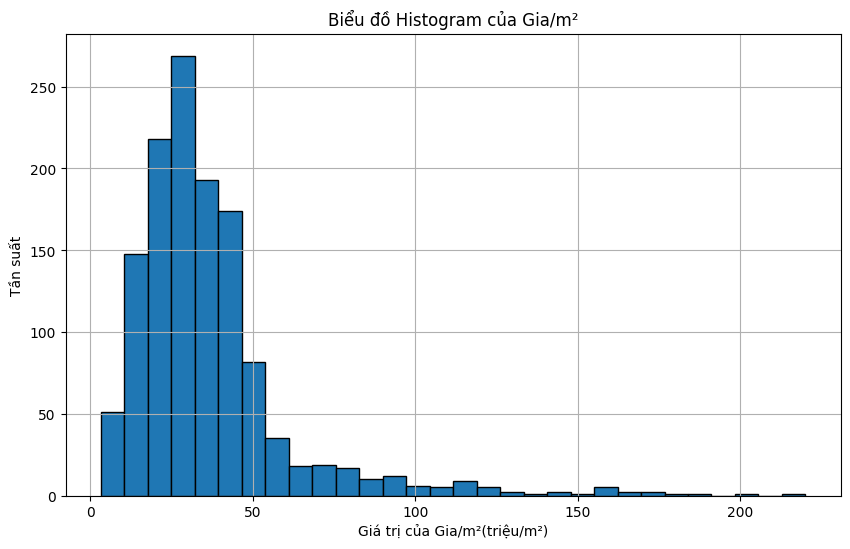

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Gia/m²'], bins=30, edgecolor='black')
plt.title('Biểu đồ Histogram của Gia/m²')
plt.xlabel('Giá trị của Gia/m²(triệu/m²)')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

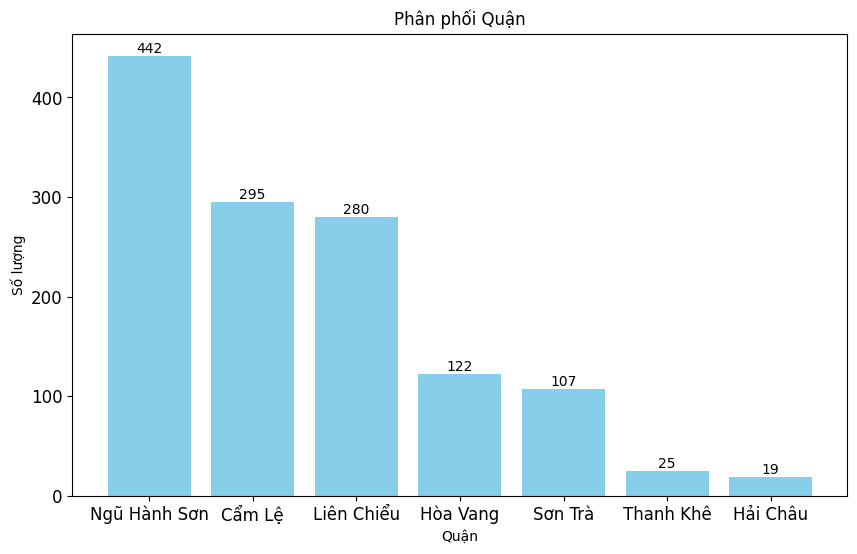

In [35]:
count_quan = df_clean['Quan'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(count_quan.index, count_quan.values, color='skyblue')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối Quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng')

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Loại hình đất chưa clean

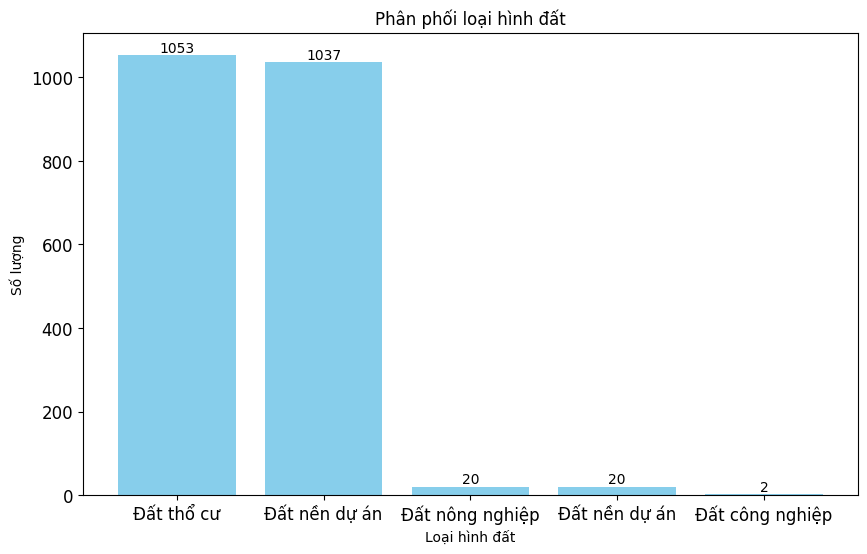

In [6]:
count_by_loai_dat = df_crawl['Loai hinh dat'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(count_by_loai_dat.index, count_by_loai_dat.values, color='skyblue')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối loại hình đất')
plt.xlabel('Loại hình đất')
plt.ylabel('Số lượng')

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Loại hình đất khi clean

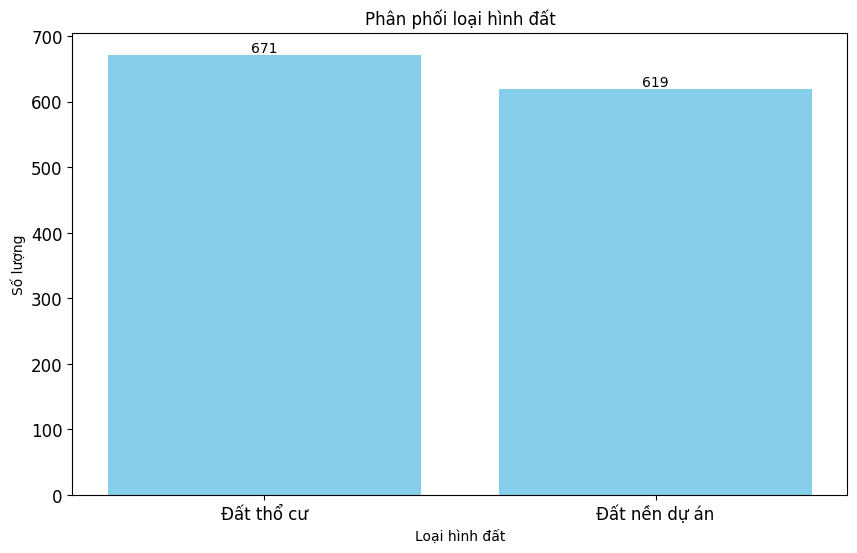

In [7]:
count_by_loai_dat = df_clean['Loai hinh dat'].value_counts()

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(count_by_loai_dat.index, count_by_loai_dat.values, color='skyblue')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối loại hình đất')
plt.xlabel('Loại hình đất')
plt.ylabel('Số lượng')

# Hiển thị giá trị trên mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Hiển thị biểu đồ
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

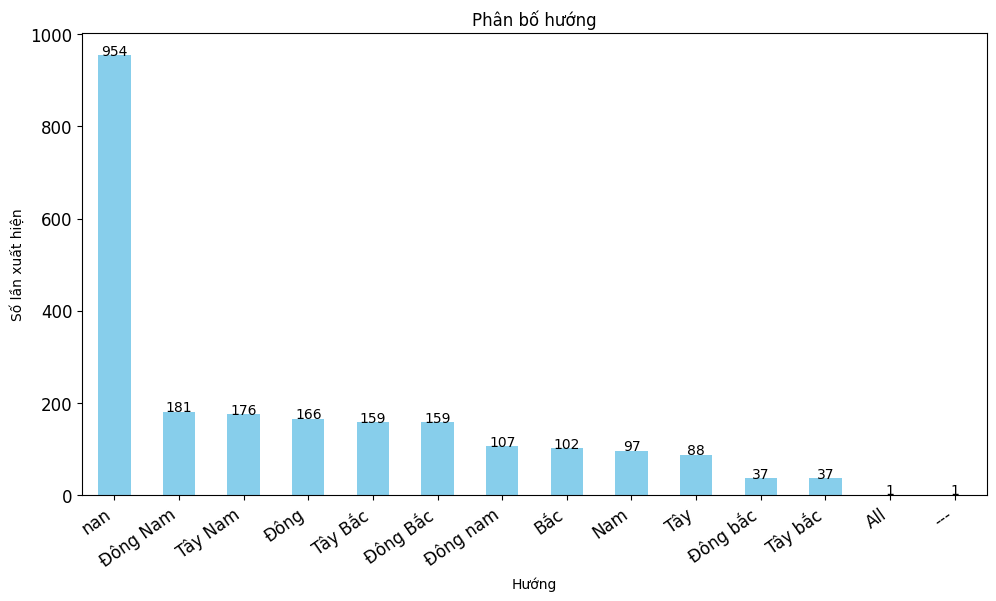

In [68]:
df_crawl['Huong dat'] = df_crawl['Huong dat'].str.replace('Hướng: ', '', regex=False)

# Đếm số lần xuất hiện của mỗi giá trị trong cột "huong", bao gồm cả giá trị null
direction_counts = df_crawl['Huong dat'].value_counts(dropna=False)

# Vẽ biểu đồ
if direction_counts.empty:
    print("Không có dữ liệu để vẽ biểu đồ.")
else:
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    direction_counts.plot(kind='bar', color='skyblue')
    plt.title('Phân bố hướng')
    plt.xlabel('Hướng')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=35, ha='right')
    
    # Hiển thị giá trị của từng cột
    for i, value in enumerate(direction_counts):
        plt.text(i, value + 0.2, str(value), ha='center')
    
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

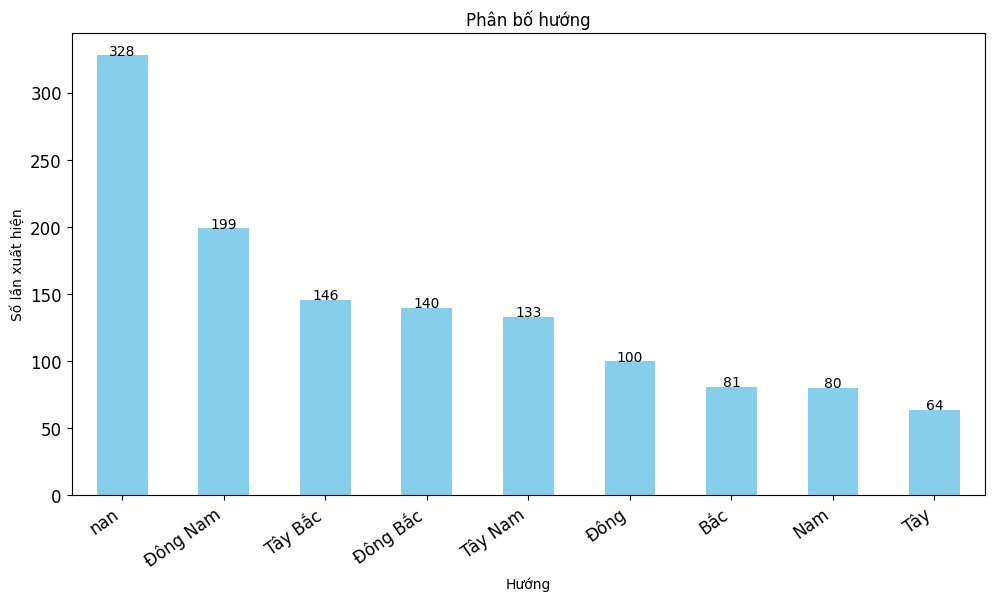

In [69]:
direction_counts = df_clean['Huong dat'].value_counts(dropna=False)

# Vẽ biểu đồ
if direction_counts.empty:
    print("Không có dữ liệu để vẽ biểu đồ.")
else:
    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    direction_counts.plot(kind='bar', color='skyblue')
    plt.title('Phân bố hướng')
    plt.xlabel('Hướng')
    plt.ylabel('Số lần xuất hiện')
    plt.xticks(rotation=35, ha='right')
    
    # Hiển thị giá trị của từng cột
    for i, value in enumerate(direction_counts):
        plt.text(i, value + 0.2, str(value), ha='center')
    
    plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

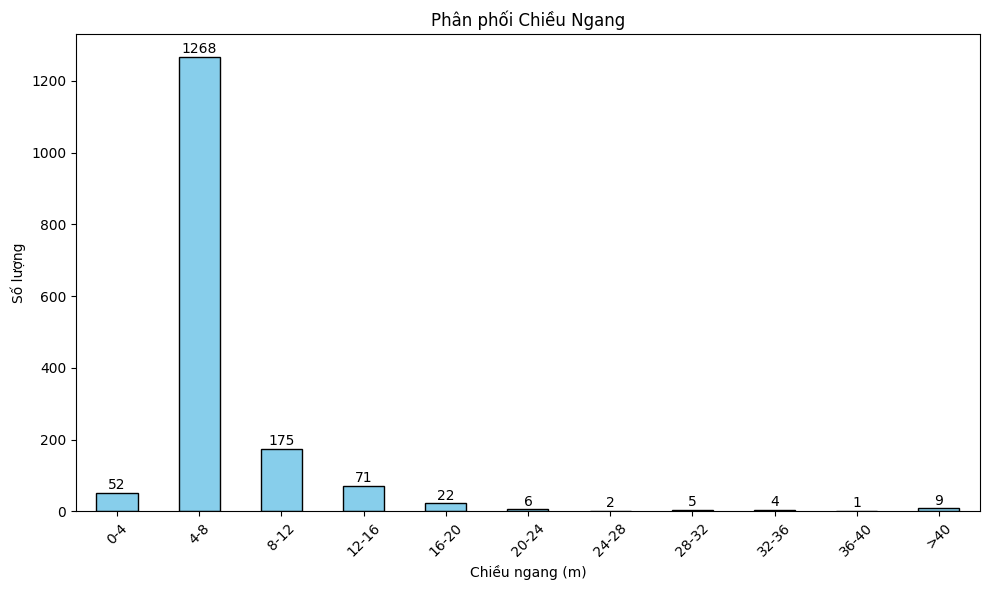

In [70]:
df_crawl['Chieu ngang'] = df_crawl['Chieu ngang'].astype(str)
df_crawl['Chieu ngang'] = df_crawl['Chieu ngang'].str.replace('m', '')
df_crawl['Chieu ngang'] = df_crawl['Chieu ngang'].str.replace('Mặt tiền: ', '')
df_crawl['Chieu ngang'] = pd.to_numeric(df_crawl['Chieu ngang'], errors='coerce')
bins = np.arange(0, 44, 4)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_crawl['Chieu ngang'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối Chiều Ngang')
plt.xlabel('Chiều ngang (m)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=45)

plt.tight_layout()
plt.show()


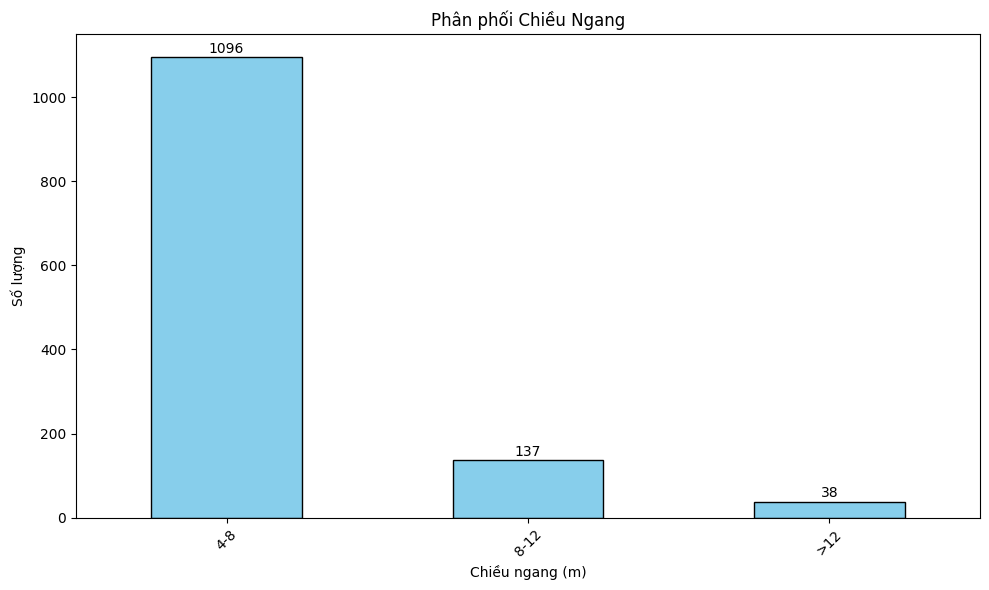

In [71]:

bins = np.arange(4, 16, 4)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_clean['Chieu ngang'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối Chiều Ngang')
plt.xlabel('Chiều ngang (m)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=45)

plt.tight_layout()
plt.show()


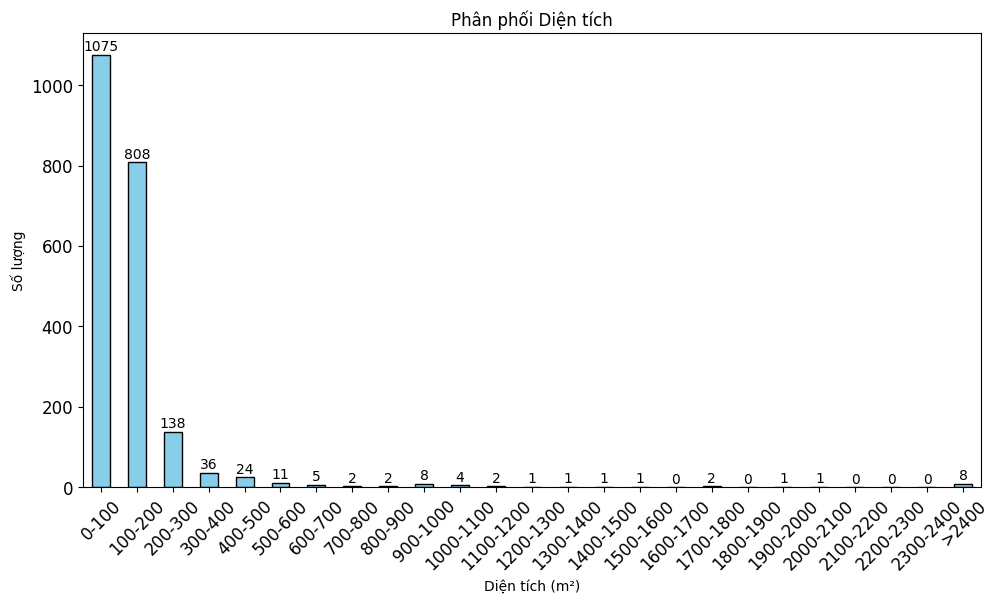

In [72]:
df_crawl['Dien tich'] = df_crawl['Dien tich'].astype(str)
df_crawl['Dien tich'] = df_crawl['Dien tich'].str.replace('m²', '')
df_crawl['Dien tich'] = pd.to_numeric(df_crawl['Dien tich'], errors='coerce')
bins = np.arange(0, 2500, 100)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_crawl['Dien tich'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối Diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=45)

plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

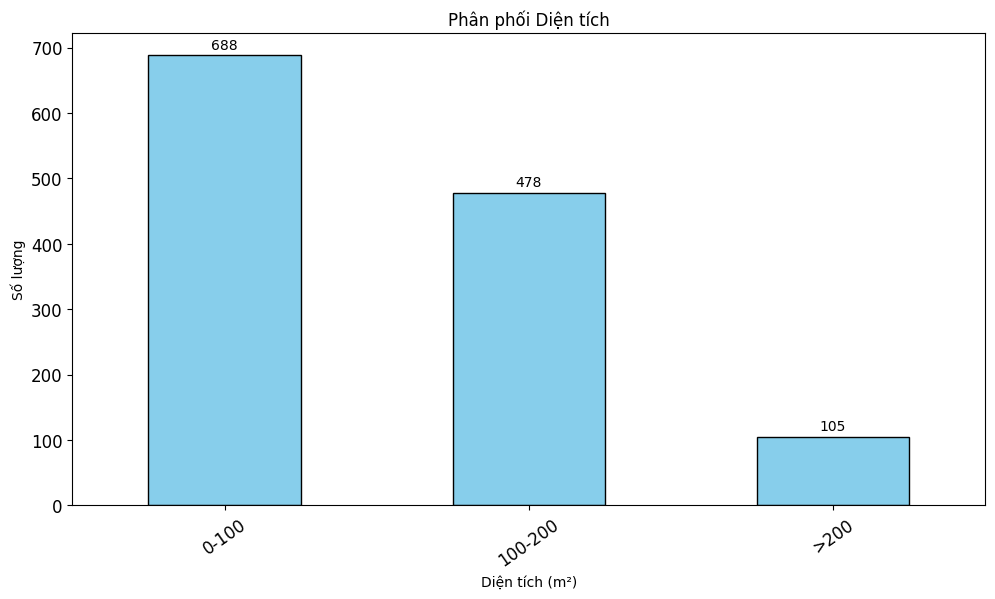

In [73]:
bins = np.arange(0, 300, 100)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_clean['Dien tich'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối Diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=35)

plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

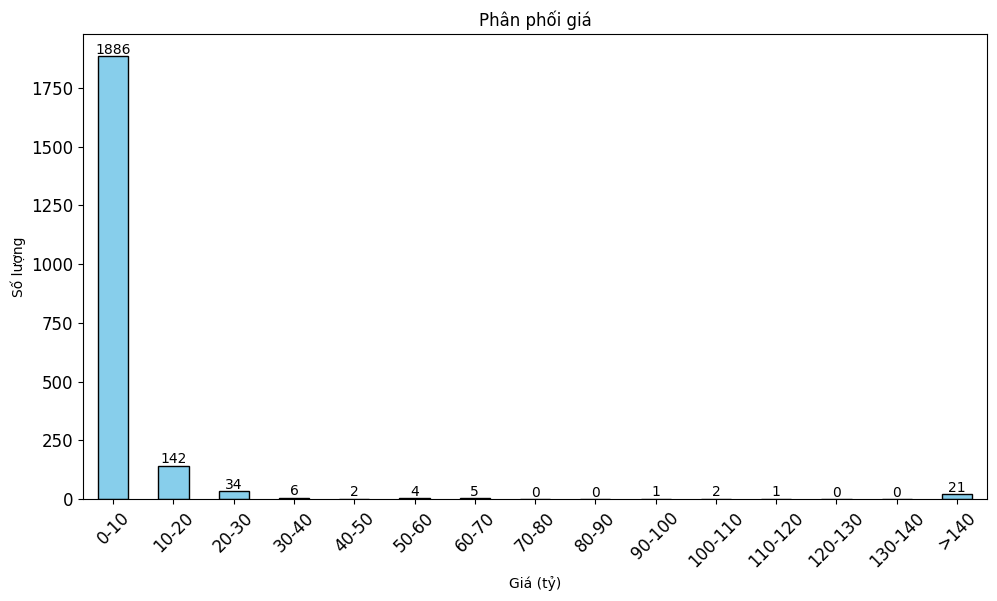

In [19]:
df_crawl['Gia'] = df_crawl['Gia'].astype(str)
df_crawl['Gia'] = df_crawl['Gia'].str.lower()
df_crawl['Gia'] = df_crawl['Gia'].str.split(' - ').str[0]
df_crawl.dropna(subset=['Gia'], inplace=True)
df_crawl = df_crawl[~df_crawl['Gia'].str.contains('đ')]
df_crawl['Gia'] = df_crawl['Gia'].str.replace(',', '.')
df_crawl['Gia'] = df_crawl['Gia'].apply(remove_tỉ_and_convert)
df_crawl['Gia'] = df_crawl['Gia'].apply(convert_to_billion)
df_crawl = df_crawl[df_crawl["Gia"] != 'thỏa thuận']

# plt.show()
bins = np.arange(0, 150, 10)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_crawl['Gia'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá (tỷ)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=45)

plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

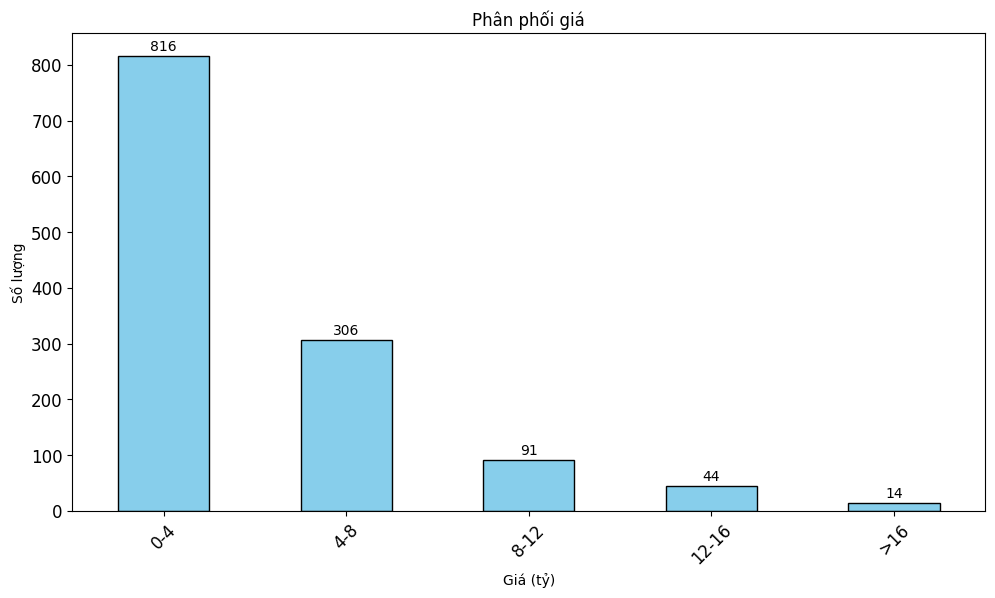

In [75]:
bins = np.arange(0, 20, 4)
bins = np.append(bins, np.inf)

# Tính toán số lượng trong mỗi bin
bin_counts = pd.cut(df_clean['Gia'].astype(float), bins=bins).value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Phân phối giá')
plt.xlabel('Giá (tỷ)')
plt.ylabel('Số lượng')

# Đặt nhãn cho từng thanh
for i, val in enumerate(bin_counts):
    plt.text(i, val + 10, str(val), horizontalalignment='center')

# Đặt nhãn cho trục x
labels = [f"{int(b.left)}-{int(b.right)}" if b.right != np.inf else f">{int(b.left)}" for b in bin_counts.index]
plt.xticks(range(len(bin_counts)), labels, rotation=45)

plt.tight_layout()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

KẾT THÚC